In [1]:
#I will be using this notebook to build my final Capstone project
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Step 1 - Scrape the London boroughs Wikipedia page and put the postcodes into a dataframe

In [2]:
from urllib.request import urlopen
import urllib.request
from bs4 import BeautifulSoup
import re

url = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "html")

#print(soup.prettify())
all_tables=soup.find_all("table")
all_tables

right_table = soup.find('table',class_='wikitable sortable')

#print(right_table)
Location=[]
Borough=[]
PostalCode=[]



for row in right_table.find_all('tr'):
    cells = row.find_all('td')
    #print(cells)
    #for single in cells:
        #print(single)
    if len(cells) > 0:
        Location.append(cells[0].text.strip())
        Borough.append(cells[1].text.strip())
        PostalCode.append(cells[3].text.strip())

#print(Location)

df=pd.DataFrame(Location,columns=['Location'])
df['Borough']=Borough
df['PostalCode']=PostalCode

df['Location'] = df['Location'].astype('str')
df['Borough'] = df['Borough'].astype('str')
df['PostalCode'] = df['PostalCode'].astype('str')
df=df.astype('str')

df['PostalCode2'] = df['PostalCode'].str.extract('([A-Z]*\d+)', expand=True)
drop_df = df.drop(columns=['PostalCode'],axis=1)
group_df=drop_df.groupby(['PostalCode2'])['Location'].apply('/'.join)
new_df=pd.DataFrame(group_df)
new_df2=new_df.reset_index()
new_df2.shape

#new_df2['PostalCode2']

new_df2

,PostalCode2,Location
0,5,Blendon
1,BR1,Bromley/Downham/Plaistow/Sundridge/Widmore (al...
2,BR2,Hayes/Keston/Leaves Green/Southborough
3,BR3,Beckenham/Bickley/Bromley Common/Eden Park/Elm...
4,BR4,Coney Hall/West Wickham
5,BR5,Derry Downs/Orpington/Petts Wood/St Mary Cray/...
6,BR6,Chelsfield/Downe/Goddington/Hazelwood/Locksbot...
7,BR7,Chislehurst/Elmstead
8,CR0,Addington/Addiscombe/Coombe/Croydon/Forestdale...
9,CR2,Sanderstead/Selsdon/South Croydon


##  Step 2 - Use the geolocator to return the longitude and latitude for each post code

In [3]:
!pip install geocoder 
import geocoder 

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011


In [4]:
def get_geocoder(postal_code_from_df):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, England'.format(postal_code_from_df))
        lat_lng_coords=g.latlng
    neigh_lat = lat_lng_coords[0]
    neigh_lng = lat_lng_coords[1]
    return neigh_lat, neigh_lng

update_df=new_df2
update_df['Latitude'], update_df['Longitude'] = zip(*update_df['PostalCode2'].apply(get_geocoder))

update_df.head(30)

,PostalCode2,Location,Latitude,Longitude
0,5,Blendon,50.724589,-1.164619
1,BR1,Bromley/Downham/Plaistow/Sundridge/Widmore (al...,51.416710,0.009042
2,BR2,Hayes/Keston/Leaves Green/Southborough,51.506420,-0.127210
3,BR3,Beckenham/Bickley/Bromley Common/Eden Park/Elm...,51.415095,-0.035403
4,BR4,Coney Hall/West Wickham,51.506420,-0.127210
5,BR5,Derry Downs/Orpington/Petts Wood/St Mary Cray/...,51.506420,-0.127210
6,BR6,Chelsfield/Downe/Goddington/Hazelwood/Locksbot...,51.506420,-0.127210
7,BR7,Chislehurst/Elmstead,51.413275,0.087473
8,CR0,Addington/Addiscombe/Coombe/Croydon/Forestdale...,51.384755,-0.051499
9,CR2,Sanderstead/Selsdon/South Croydon,51.506420,-0.127210


## Step 3 - User selects area within London they would like to explore

In [5]:
user_location = input('Enter "North","South","East" or "West"')
post='Please try again'
if user_location == 'East':
    post = 'E'
elif user_location == 'North':
    post = 'N'
elif user_location == 'South':
    post = 'S'
elif user_location == 'West':
    post = 'W'
    
print(post)

Enter "North","South","East" or "West"South
S


In [6]:
df1 = update_df[update_df['PostalCode2'].str.startswith(post)]
df1

,PostalCode2,Location,Latitude,Longitude
117,SE1,Bankside/Bermondsey/Elephant and Castle/Lambet...,51.499960,-0.09568
118,SE10,Greenwich/Maze Hill,51.484540,0.00275
119,SE11,Kennington,51.490840,-0.11108
120,SE12,Chinbrook/Grove Park/Horn Park/Lee,51.447590,0.01350
121,SE13,Hither Green/Lewisham,51.461960,-0.00754
122,SE14,New Cross,51.474890,-0.04038
123,SE15,Nunhead/Peckham,51.472180,-0.06779
124,SE16,Rotherhithe/Surrey Quays,51.495740,-0.05157
125,SE17,Walworth,51.487640,-0.09542
126,SE18,Plumstead/Shooter's Hill/Woolwich,51.482070,0.07143


## Step 4 - Add London details for use in map later on

In [7]:
!pip install geopy
from geopy.geocoders import Nominatim
address = 'London, England'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [10]:
!pip install folium
import folium # plotting library

In [11]:
# The code was removed by Watson Studio for sharing.

In [13]:
#PART 3
import requests
print("done")

done


## Step 5 - Return 'date night' venues such as cinema, arcades and bowling from Four Square

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng, in zip (names, latitudes, longitudes):
        print(name)
        for cell in {'cinema','theatre','bowling','golf','escape','arcade'}:
            search_query=cell
    
        #API request
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                search_query)
    
        #GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            if results is None:
                continue
    
        #Return relevant info for each nearby venue
            venues_list.append([(
                name,
                lat,
                lng,
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['categories'][0]['name']) for v in results])
    
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood',
                        'Neighborhood Latitude', 
                        'Neighborhood Longitude', 
                        'Venue', 
                        'Venue Latitude', 
                        'Venue Longitude', 
                        'Venue Category']
    
    return(nearby_venues)

In [15]:
entertainment_venues = getNearbyVenues(names=df1['Location'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

Bankside/Bermondsey/Elephant and Castle/Lambeth/Newington
Greenwich/Maze Hill
Kennington
Chinbrook/Grove Park/Horn Park/Lee
Hither Green/Lewisham
New Cross
Nunhead/Peckham
Rotherhithe/Surrey Quays
Walworth
Plumstead/Shooter's Hill/Woolwich
Crystal Palace/Gipsy Hill/Upper Norwood
Abbey Wood/Crossness/West Heath
Anerley/Penge
Dulwich/Sydenham Hill
East Dulwich
Forest Hill/Honor Oak
Herne Hill/Tulse Hill
Selhurst/South Norwood
Sydenham (also Lower Sydenham, Upper Sydenham)
West Norwood
Thamesmead
Blackheath/Blackheath Royal Standard/Kidbrooke/Westcombe Park
Brockley/Crofton Park/Ladywell/St Johns
Camberwell/Denmark Hill
Bellingham/Catford/Southend
Charlton
Deptford
Eltham/Falconwood/Longlands/Middle Park/Mottingham/New Eltham/Well Hall
Cheam/Sutton
Belmont
Lower Morden/Morden/Morden Park/St Helier
Carshalton
Beddington/Wallington
Belgravia/Knightsbridge/Millbank/Pimlico/St James's/Westminster
West Brompton
Battersea
Balham
Barnes/Castelnau
East Sheen/Mortlake
Kingston Vale/Putney/Roehampt

In [16]:
print(entertainment_venues.shape)
entertainment_venues.tail(30)

(181, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
151,West Brompton,51.48563,-0.18144,Eight Over Eight,51.483798,-0.176956,Asian Restaurant
152,Battersea,51.46760,-0.16290,BAC (Battersea Arts Centre),51.464816,-0.160772,Theater
153,Balham,51.44822,-0.14839,Escape The Daily Grind,51.444892,-0.150731,Café
154,Barnes/Castelnau,51.47457,-0.24212,Olympic Cinema,51.475171,-0.240435,Movie Theater
155,Barnes/Castelnau,51.47457,-0.24212,Olympic Studios Cafe + Dining Room,51.475158,-0.240333,Indie Movie Theater
156,Kingston Vale/Putney/Roehampton,51.45755,-0.21845,Putney Arts Theatre,51.461441,-0.219718,Theater
157,Tooting/Tooting Bec,51.43037,-0.16558,Buzz Bingo,51.426569,-0.167323,General Entertainment
158,Earlsfield/Southfields/Wandsworth,51.45066,-0.18997,Cineworld,51.454138,-0.193082,Multiplex
159,Colliers Wood/Merton Park/South Wimbledon/Wimb...,51.42170,-0.20796,Curzon Wimbledon,51.420346,-0.205231,Movie Theater
160,Colliers Wood/Merton Park/South Wimbledon/Wimb...,51.42170,-0.20796,Odeon,51.419870,-0.204848,Multiplex


## Step 6 - Select a random entertainment venue from the dataframe - this will be the centre of the date night

#### User can repeat this step until they find something that might be of interest to them

In [17]:
random_subset = entertainment_venues.sample(n=1)
random_subset.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
66,Belmont,51.50642,-0.12721,Harold Pinter Theatre,51.509443,-0.131644,Theater


In [18]:
entertainment_latitude=random_subset['Venue Latitude']
entertainment_longitude=random_subset['Venue Longitude']
entertainment=random_subset['Venue']

## Step 7 - Return bars that are within 500 metres of the previously created entertainment venue

In [19]:
def getNearbyBars(names, latitudes, longitudes, radius=500):
    search_query='bar'
    LIMIT = 50
    venues_list=[]
    for name, lat, lng, in zip (names, latitudes, longitudes):
        print(name)    
        #API request
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            search_query)
    
        #GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
        #Return relevant info for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_bars = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_bars.columns = ['Entertainment',
                        'Entertainment Latitude', 
                        'Entertainment Longitude', 
                        'Bar', 
                        'Bar ID',
                        'Bar Latitude', 
                        'Bar Longitude', 
                        'Bar Category']
    
    return(nearby_bars)

In [20]:
bar_venues = getNearbyBars(names=entertainment,
                                   latitudes=entertainment_latitude,
                                   longitudes=entertainment_longitude
                                  )

Harold Pinter Theatre


In [21]:
print(bar_venues.shape)
bar_venues.tail(5)

(50, 8)


,Entertainment,Entertainment Latitude,Entertainment Longitude,Bar,Bar ID,Bar Latitude,Bar Longitude,Bar Category
45,Harold Pinter Theatre,51.509443,-0.131644,Balans Soho Society,4ace0a5df964a52007ce20e3,51.512734,-0.132540,Restaurant
46,Harold Pinter Theatre,51.509443,-0.131644,The Admiralty,545bfbd6498eeac3dda21da0,51.507303,-0.128847,Pub
47,Harold Pinter Theatre,51.509443,-0.131644,Brasserie Zédel,4ff5e7d9e4b07a70b860711a,51.510578,-0.135554,French Restaurant
48,Harold Pinter Theatre,51.509443,-0.131644,Pret A Manger,4acf4a24f964a52003d320e3,51.507373,-0.128634,Sandwich Place
49,Harold Pinter Theatre,51.509443,-0.131644,Dalla Terra,4f4c4dfdbe77653fc3a6d645,51.512520,-0.126469,Wine Bar


## Step 8 - Prep data for use in K cluster

In [22]:
bar_venues.groupby('Bar').count()

,Entertainment,Entertainment Latitude,Entertainment Longitude,Bar ID,Bar Latitude,Bar Longitude,Bar Category
Bar,,,,,,,
Archer Street,1,1,1,1,1,1,1
Balans Soho Society,1,1,1,1,1,1,1
Bar Americain,1,1,1,1,1,1,1
Bar Bruno,1,1,1,1,1,1,1
Bar Italia,1,1,1,1,1,1,1
Bar Termini,1,1,1,1,1,1,1
Be At One,1,1,1,1,1,1,1
Blacks Club,1,1,1,1,1,1,1
Blind Spot,1,1,1,1,1,1,1


In [23]:
# one hot encoding
bars_onehot = pd.get_dummies(bar_venues[['Bar Category']], prefix="", prefix_sep="")

bars_onehot['Bar'] = bar_venues['Bar'] 

first_col = bars_onehot.pop('Bar')
bars_onehot.insert(0,'Bar',first_col)

bars_onehot.head()

,Bar,Café,Cocktail Bar,Coffee Shop,French Restaurant,Gay Bar,Gourmet Shop,Italian Restaurant,Lounge,Mexican Restaurant,Movie Theater,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Speakeasy,Wine Bar
0,The London Beer House,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Opium Cocktails & Dim Sum Parlour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,The Blue Posts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Picturehouse Central Bar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ham Yard Bar & Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
bars_grouped = bars_onehot.groupby('Bar').mean().reset_index()
bars_grouped

,Bar,Café,Cocktail Bar,Coffee Shop,French Restaurant,Gay Bar,Gourmet Shop,Italian Restaurant,Lounge,Mexican Restaurant,Movie Theater,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Speakeasy,Wine Bar
0,Archer Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Balans Soho Society,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Bar Americain,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bar Bruno,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bar Italia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bar Termini,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Be At One,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Blacks Club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Blind Spot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,Bocca Di Lupo,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 1

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Bar']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bar_venues_sorted = pd.DataFrame(columns=columns)
bar_venues_sorted['Bar'] = bars_grouped['Bar']

for ind in np.arange(bars_grouped.shape[0]):
    bar_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bars_grouped.iloc[ind, :], num_top_venues)

bar_venues_sorted.head()

,Bar,1st Most Common Venue
0,Archer Street,Wine Bar
1,Balans Soho Society,Restaurant
2,Bar Americain,Cocktail Bar
3,Bar Bruno,Café
4,Bar Italia,Wine Bar


## Step 9 - Find the optimum K number using the elbow method

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
bars_grouped_clustering = bars_grouped.drop('Bar', 1)
mms = MinMaxScaler()
mms.fit(bars_grouped_clustering)
data_transformed = mms.transform(bars_grouped_clustering)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(bars_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

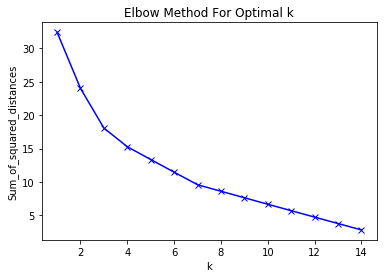

In [31]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Step 10 - Select the optimum K number based on the elbow graph, to return the clusters of bars

In [32]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bars_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans_labels=kmeans.labels_
#kmeans.labels_[0:10]

In [33]:
bar_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bars_merged=bar_venues_sorted
#london_merged['Cluster Labels']=kmeans.labels

bars_merged = bars_merged.join(bar_venues.set_index('Bar'), on='Bar')

bars_merged.head()


,Cluster Labels,Bar,1st Most Common Venue,Entertainment,Entertainment Latitude,Entertainment Longitude,Bar ID,Bar Latitude,Bar Longitude,Bar Category
0,1,Archer Street,Wine Bar,Harold Pinter Theatre,51.509443,-0.131644,4f401be7e4b0daed4261dc94,51.511529,-0.134031,Bar
1,0,Balans Soho Society,Restaurant,Harold Pinter Theatre,51.509443,-0.131644,4ace0a5df964a52007ce20e3,51.512734,-0.132540,Restaurant
2,4,Bar Americain,Cocktail Bar,Harold Pinter Theatre,51.509443,-0.131644,502eac44e4b047efed0c6eb8,51.510580,-0.135472,Cocktail Bar
3,1,Bar Bruno,Café,Harold Pinter Theatre,51.509443,-0.131644,4ad9b76ef964a520811a21e3,51.512986,-0.133723,Café
4,1,Bar Italia,Wine Bar,Harold Pinter Theatre,51.509443,-0.131644,4ac518bcf964a5207ba220e3,51.513394,-0.131334,Bar


## Step 11 - Build map showing the entertainment venue and clusters of bars

In [34]:
!pip install folium
import folium # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors


In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bars_merged['Bar Latitude'], bars_merged['Bar Longitude'], bars_merged['Bar'], bars_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    
folium.CircleMarker(
    [entertainment_latitude, entertainment_longitude],
    radius=10,
    popup= entertainment,
    fill=True,
    color='red',
    fill_color='green',
    fill_opacity=0.6
    ).add_to(map_clusters)
       
map_clusters

## Step 12 - Return the clustered groups. The user then selects which 'type' of bar they want to go to

In [36]:
bars_merged.loc[bars_merged['Cluster Labels'] == 0, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
1,Balans Soho Society,Harold Pinter Theatre,4ace0a5df964a52007ce20e3,51.512734,-0.132540,Restaurant
20,Dean Street Townhouse Dining Room,Harold Pinter Theatre,4bafe7def964a5207e2a3ce3,51.513478,-0.132479,Restaurant
21,Duck Soup,Harold Pinter Theatre,4e85ad77e5fab0fb1125fc54,51.513294,-0.132289,Restaurant


In [37]:
bars_merged.loc[bars_merged['Cluster Labels'] == 1, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
0,Archer Street,Harold Pinter Theatre,4f401be7e4b0daed4261dc94,51.511529,-0.134031,Bar
3,Bar Bruno,Harold Pinter Theatre,4ad9b76ef964a520811a21e3,51.512986,-0.133723,Café
4,Bar Italia,Harold Pinter Theatre,4ac518bcf964a5207ba220e3,51.513394,-0.131334,Bar
7,Blacks Club,Harold Pinter Theatre,4ad75e3bf964a520db0921e3,51.513369,-0.132356,Bar
9,Bocca Di Lupo,Harold Pinter Theatre,4ad21d7ef964a52079df20e3,51.511607,-0.133939,Italian Restaurant
10,Brasserie Zédel,Harold Pinter Theatre,4ff5e7d9e4b07a70b860711a,51.510578,-0.135554,French Restaurant
11,Browns,Harold Pinter Theatre,4b64647af964a52098af2ae3,51.511353,-0.127195,Bar
12,Carpo Piccadilly,Harold Pinter Theatre,5113babbd63e8bb673ce4b25,51.509564,-0.135536,Gourmet Shop
13,Century Club,Harold Pinter Theatre,4b0dbfc7f964a520534f23e3,51.512089,-0.132164,Bar
14,Ceviche Soho,Harold Pinter Theatre,4ed619be0cd6b3fd4c41cff4,51.513700,-0.131546,Bar


In [38]:
bars_merged.loc[bars_merged['Cluster Labels'] == 2, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
18,Dalla Terra,Harold Pinter Theatre,4f4c4dfdbe77653fc3a6d645,51.512520,-0.126469,Wine Bar
38,Terroirs,Harold Pinter Theatre,4ac518c6f964a52020a520e3,51.509547,-0.125250,Wine Bar


In [39]:
bars_merged.loc[bars_merged['Cluster Labels'] == 3, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
24,French House,Harold Pinter Theatre,4ac518d7f964a52057a820e3,51.512698,-0.131830,Pub
31,Mr Fogg's Tavern,Harold Pinter Theatre,562be808498e1e1da93d90c7,51.511000,-0.126952,Pub
39,The Admiralty,Harold Pinter Theatre,545bfbd6498eeac3dda21da0,51.507303,-0.128847,Pub
42,The Chandos,Harold Pinter Theatre,4ac518bcf964a5208fa220e3,51.509454,-0.126753,Pub
43,The Harp,Harold Pinter Theatre,4acf3b84f964a520d0d220e3,51.509719,-0.125943,Pub
45,The Lamb & Flag,Harold Pinter Theatre,4ac518c3f964a52038a420e3,51.511718,-0.125695,Pub
47,The Lyric,Harold Pinter Theatre,4b2a956af964a520ceab24e3,51.511335,-0.134367,Pub


In [40]:
bars_merged.loc[bars_merged['Cluster Labels'] == 4, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
2,Bar Americain,Harold Pinter Theatre,502eac44e4b047efed0c6eb8,51.510580,-0.135472,Cocktail Bar
5,Bar Termini,Harold Pinter Theatre,54721a4e498e6a8f6dec6366,51.513708,-0.129876,Cocktail Bar
6,Be At One,Harold Pinter Theatre,4ad36864f964a52039e420e3,51.511512,-0.134319,Cocktail Bar
15,Cicchetti,Harold Pinter Theatre,509b83b8e4b08fb1c9aab6f0,51.509650,-0.134906,Cocktail Bar
16,Covent Garden Cocktail Club,Harold Pinter Theatre,4b1fb612f964a520482824e3,51.511831,-0.127402,Cocktail Bar
22,Experimental Cocktail Club,Harold Pinter Theatre,4cf6a1e781cd6dcb13c17c0d,51.511856,-0.130955,Cocktail Bar
29,Jack Solomon,Harold Pinter Theatre,5a209bd825fb7b50c59a165d,51.510967,-0.133759,Cocktail Bar
34,Peony,Harold Pinter Theatre,547503ae498e3d34e4fe94ca,51.511780,-0.131511,Cocktail Bar
37,St James Bar,Harold Pinter Theatre,4d260e8137a1b60cf4599cb8,51.507442,-0.132402,Cocktail Bar
40,The Alchemist,Harold Pinter Theatre,5c010eae872f7d003823b8ed,51.511458,-0.126955,Cocktail Bar


In [41]:
bars_merged.loc[bars_merged['Cluster Labels'] == 5, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
23,Freedom Bar & Club,Harold Pinter Theatre,4b60b22ef964a52086f429e3,51.512685,-0.133430,Gay Bar
25,Halfway 2 Heaven,Harold Pinter Theatre,4baa57e6f964a5202b613ae3,51.508426,-0.126516,Gay Bar


In [42]:
bars_merged.loc[bars_merged['Cluster Labels'] == 6, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

,Bar,Entertainment,Bar ID,Bar Latitude,Bar Longitude,Bar Category
8,Blind Spot,Harold Pinter Theatre,4ac518bef964a52022a320e3,51.510430,-0.126747,Speakeasy
33,Opium Cocktails & Dim Sum Parlour,Harold Pinter Theatre,50b10c8ce4b0ed6fa935ac0c,51.511742,-0.131384,Speakeasy


In [43]:
cluster_0 = bars_merged.loc[bars_merged['Cluster Labels'] == 0, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]
cluster_1 = bars_merged.loc[bars_merged['Cluster Labels'] == 1, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]
cluster_2 = bars_merged.loc[bars_merged['Cluster Labels'] == 2, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]
cluster_3 = bars_merged.loc[bars_merged['Cluster Labels'] == 3, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]
cluster_4 = bars_merged.loc[bars_merged['Cluster Labels'] == 4, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]
cluster_5 = bars_merged.loc[bars_merged['Cluster Labels'] == 5, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]
cluster_6 = bars_merged.loc[bars_merged['Cluster Labels'] == 6, bars_merged.columns[[1] + [3] + list(range(6, bars_merged.shape[1]))]]

## Step 13 - Return the score and cost for each bar in the user chosen cluster (1, 2, 3 etc.)

In [44]:
def getScores(names, bar_ID, bar_latitude, bar_longitude):
    bar_scoring_list = []
    for name, venue_id, lat, lng in zip (names, bar_ID, bar_latitude, bar_longitude):
        print(name)    

        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION).format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            venue_id,
        )
    
        #GET request
        bar_results = requests.get(url).json()
    
        #Return relevant info for each nearby venue
        bar_scoring_list.append([(
            name,
            lat,
            lng,
            bar_results["response"]['venue']['rating'],
            bar_results["response"]['venue']["attributes"]['groups'][0]['summary'])])
        
        #try:
            #bar_scoring_list.append([(
                #bar_results["response"]['venue']['menu']['url'])])
        #except:
            #continue
        
    bar_score = pd.DataFrame([item for bar_scoring_list in bar_scoring_list for item in bar_scoring_list])
    bar_score.columns = ['Bar',
                        'Bar Latitude', 
                        'Bar Longitude', 
                        'Bar Rating', 
                        'Bar Price']
    
    return(bar_score)

In [54]:
bar_scores = getScores(names=cluster_4['Bar'],
                        bar_ID=cluster_4['Bar ID'],
                        bar_latitude=cluster_4['Bar Latitude'],
                        bar_longitude=cluster_4['Bar Longitude']
                                  )

Bar Americain
Bar Termini
Be At One
Cicchetti
Covent Garden Cocktail Club
Experimental Cocktail Club
Jack Solomon
Peony
St James Bar
The Alchemist


In [55]:
bar_scores

,Bar,Bar Latitude,Bar Longitude,Bar Rating,Bar Price
0,Bar Americain,51.510580,-0.135472,9.0,£££
1,Bar Termini,51.513708,-0.129876,8.4,£££
2,Be At One,51.511512,-0.134319,6.8,£££
3,Cicchetti,51.509650,-0.134906,8.2,£££
4,Covent Garden Cocktail Club,51.511831,-0.127402,7.7,££
5,Experimental Cocktail Club,51.511856,-0.130955,8.4,£££
6,Jack Solomon,51.510967,-0.133759,8.0,£££
7,Peony,51.511780,-0.131511,8.6,£££
8,St James Bar,51.507442,-0.132402,7.7,£££
9,The Alchemist,51.511458,-0.126955,9.0,£££


## Step 14 - Return the restaurants from Four Square that are within 500m of the entertainment venue

In [56]:
def getNearbyRestaurants(names, latitudes, longitudes, radius=500):
    search_query='restaurant'
    LIMIT = 50
    venues_list=[]
    for name, lat, lng, in zip (names, latitudes, longitudes):
        print(name)    
        #API request
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            search_query)
    
        #GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
        #Return relevant info for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_restaurants = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_restaurants.columns = ['Entertainment',
                        'Entertainment Latitude', 
                        'Entertainment Longitude', 
                        'Restaurant', 
                        'Restaurant ID',
                        'Restaurant Latitude', 
                        'Restaurant Longitude', 
                        'Restaurant Category']
    
    return(nearby_restaurants)

In [57]:
restaurant_venues = getNearbyRestaurants(names=entertainment,
                                   latitudes=entertainment_latitude,
                                   longitudes=entertainment_longitude
                                  )

Harold Pinter Theatre


In [58]:
print(restaurant_venues.shape)
restaurant_venues.tail(5)

(50, 8)


,Entertainment,Entertainment Latitude,Entertainment Longitude,Restaurant,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
45,Harold Pinter Theatre,51.509443,-0.131644,Wahaca,4ac518c4f964a5209aa420e3,51.510221,-0.124524,Mexican Restaurant
46,Harold Pinter Theatre,51.509443,-0.131644,Le Garrick Brasserie,4ad083f6f964a5204cd820e3,51.511567,-0.126115,French Restaurant
47,Harold Pinter Theatre,51.509443,-0.131644,Patty & Bun,56ce189acd10401b9406572c,51.513595,-0.130237,Burger Joint
48,Harold Pinter Theatre,51.509443,-0.131644,Rosa's Thai Cafe,4b99390ef964a520256b35e3,51.512780,-0.131891,Thai Restaurant
49,Harold Pinter Theatre,51.509443,-0.131644,Côte Brasserie,4dd909f91f6ee1468349b6e9,51.510653,-0.126950,French Restaurant


In [59]:
restaurant_venues.groupby('Restaurant').count()

,Entertainment,Entertainment Latitude,Entertainment Longitude,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
Restaurant,,,,,,,
Ali Ocakbaşı,1,1,1,1,1,1,1
Bageriet,1,1,1,1,1,1,1
Bancone,1,1,1,1,1,1,1
Barrafina,1,1,1,1,1,1,1
Blacklock,1,1,1,1,1,1,1
Blacks Club,1,1,1,1,1,1,1
Brasserie Zédel,1,1,1,1,1,1,1
Burger & Lobster,1,1,1,1,1,1,1
Cafe Nuvo,1,1,1,1,1,1,1


## Step 15 - Prepare the restaurant data for use in K clustering

In [60]:
# one hot encoding
restaurants_onehot = pd.get_dummies(restaurant_venues[['Restaurant Category']], prefix="", prefix_sep="")

restaurants_onehot['Restaurant'] = restaurant_venues['Restaurant'] 

first_col = restaurants_onehot.pop('Restaurant')
restaurants_onehot.insert(0,'Restaurant',first_col)

restaurants_onehot.head()

,Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Bakery,Breakfast Spot,Burger Joint,Café,French Restaurant,Fried Chicken Joint,...,Persian Restaurant,Peruvian Restaurant,Pizza Place,Portuguese Restaurant,Seafood Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant
0,Japan Centre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Milos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ole & Steen,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Palomar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Evelyn‘s Table,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
restaurants_grouped = restaurants_onehot.groupby('Restaurant').mean().reset_index()
restaurants_grouped

,Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Bakery,Breakfast Spot,Burger Joint,Café,French Restaurant,Fried Chicken Joint,...,Persian Restaurant,Peruvian Restaurant,Pizza Place,Portuguese Restaurant,Seafood Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant
0,Ali Ocakbaşı,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bageriet,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bancone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barrafina,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Blacklock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Blacks Club,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Brasserie Zédel,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Burger & Lobster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,Cafe Nuvo,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Café In The Crypt,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
def return_most_common_restaurants(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 1

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Restaurant']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
restaurant_venues_sorted = pd.DataFrame(columns=columns)
restaurant_venues_sorted['Restaurant'] = restaurants_grouped['Restaurant']

for ind in np.arange(restaurants_grouped.shape[0]):
    restaurant_venues_sorted.iloc[ind, 1:] = return_most_common_restaurants(restaurants_grouped.iloc[ind, :], num_top_venues)

restaurant_venues_sorted.head()

,Restaurant,1st Most Common Venue
0,Ali Ocakbaşı,Kebab Restaurant
1,Bageriet,Bakery
2,Bancone,Italian Restaurant
3,Barrafina,Spanish Restaurant
4,Blacklock,Steakhouse


## Step 16 - Clustering analysis for restaurants

In [64]:
restaurants_grouped_clustering = restaurants_grouped.drop('Restaurant', 1)
mms = MinMaxScaler()
mms.fit(restaurants_grouped_clustering)
data_transformed = mms.transform(restaurants_grouped_clustering)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [65]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(restaurants_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

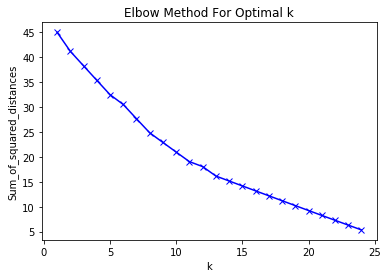

In [66]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Step 17 - Set the K number based on the result of the elbow graph

In [67]:
# set number of clusters
kclusters = 13

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurants_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_

In [68]:
# add clustering labels
#restaurant_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

restaurants_merged=restaurant_venues_sorted
restaurants_merged['Cluster Labels']=kmeans_labels

restaurants_merged = restaurants_merged.join(restaurant_venues.set_index('Restaurant'), on='Restaurant')

restaurants_merged.head()

,Restaurant,1st Most Common Venue,Cluster Labels,Entertainment,Entertainment Latitude,Entertainment Longitude,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,Ali Ocakbaşı,Kebab Restaurant,4,Harold Pinter Theatre,51.509443,-0.131644,5a40b031cf72a02cf12cfdb0,51.510018,-0.129053,Kebab Restaurant
1,Bageriet,Bakery,9,Harold Pinter Theatre,51.509443,-0.131644,517e59cfe4b0eef584494da4,51.512016,-0.126164,Bakery
2,Bancone,Italian Restaurant,5,Harold Pinter Theatre,51.509443,-0.131644,5b420a45b1ec13002cb58037,51.509529,-0.126434,Italian Restaurant
3,Barrafina,Spanish Restaurant,4,Harold Pinter Theatre,51.509443,-0.131644,53bab96d498e7e355fb53d6c,51.509427,-0.125894,Spanish Restaurant
4,Blacklock,Steakhouse,2,Harold Pinter Theatre,51.509443,-0.131644,54d7d1bf498e66f5eedd6c5e,51.511758,-0.134698,Steakhouse


## Step 18 - Produce graph showing the entertainment venue and the clustered restaurants nearby

In [69]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurants_merged['Restaurant Latitude'], restaurants_merged['Restaurant Longitude'], restaurants_merged['Restaurant'], restaurants_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    
folium.CircleMarker(
    [entertainment_latitude, entertainment_longitude],
    radius=10,
    popup= entertainment,
    fill=True,
    color='red',
    fill_color='green',
    fill_opacity=0.6
    ).add_to(map_clusters)
       
map_clusters

## Step 19 - Show the user the lists of clustered restaurants for them to choose from

In [70]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 0, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]

,Restaurant,Entertainment,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
16,Five Guys,Harold Pinter Theatre,593a844cc876c8327e196ea9,51.510292,-0.133402,Burger Joint
21,Honest Burgers,Harold Pinter Theatre,501d1b63e4b035a2200fd19e,51.513418,-0.132884,Burger Joint
35,Patty & Bun,Harold Pinter Theatre,56ce189acd10401b9406572c,51.513595,-0.130237,Burger Joint


In [71]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 1, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]

,Restaurant,Entertainment,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
6,Brasserie Zédel,Harold Pinter Theatre,4ff5e7d9e4b07a70b860711a,51.510578,-0.135554,French Restaurant
12,Côte Brasserie,Harold Pinter Theatre,4dd909f91f6ee1468349b6e9,51.510653,-0.126950,French Restaurant
28,Le Garrick Brasserie,Harold Pinter Theatre,4ad083f6f964a5204cd820e3,51.511567,-0.126115,French Restaurant


In [72]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 2, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]

,Restaurant,Entertainment,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
4,Blacklock,Harold Pinter Theatre,54d7d1bf498e66f5eedd6c5e,51.511758,-0.134698,Steakhouse
20,Hawksmoor Air Street,Harold Pinter Theatre,5060af30e4b05cb4c6f51de2,51.509721,-0.136162,Steakhouse
43,Steak & Co.,Harold Pinter Theatre,4c794ed9794e224b11f86428,51.509923,-0.128494,Steakhouse


In [74]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 3, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]

,Restaurant,Entertainment,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
8,Cafe Nuvo,Harold Pinter Theatre,4e11753eb0fbfef99b921f9d,51.511088,-0.126436,Café
9,Café In The Crypt,Harold Pinter Theatre,4b228bfef964a520c34824e3,51.508962,-0.126729,Café
37,Portrait Restaurant,Harold Pinter Theatre,4af41e26f964a52024f021e3,51.509259,-0.128202,Café


In [75]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 4, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]

,Restaurant,Entertainment,Restaurant ID,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,Ali Ocakbaşı,Harold Pinter Theatre,5a40b031cf72a02cf12cfdb0,51.510018,-0.129053,Kebab Restaurant
3,Barrafina,Harold Pinter Theatre,53bab96d498e7e355fb53d6c,51.509427,-0.125894,Spanish Restaurant
5,Blacks Club,Harold Pinter Theatre,4ad75e3bf964a520db0921e3,51.513369,-0.132356,Restaurant
11,CoCo Ichibanya,Harold Pinter Theatre,5c10e0201de76500398bf8e0,51.511875,-0.127809,Japanese Curry Restaurant
14,Evelyn‘s Table,Harold Pinter Theatre,5a8483b99fca5661257ff9f5,51.511105,-0.132662,Restaurant
15,Fernando's,Harold Pinter Theatre,4c4e8ac39932e21ec762e9cd,51.510839,-0.127045,Breakfast Spot
17,Gaucho,Harold Pinter Theatre,4ac518d5f964a520d9a720e3,51.509816,-0.137711,Argentinian Restaurant
18,Good Friend,Harold Pinter Theatre,57a5f4b9498e213efa0cfd99,51.511751,-0.128773,Fried Chicken Joint
19,Hard Rock Cafe Piccadilly Circus,Harold Pinter Theatre,5c1e4b2ed41bb7003995b2d6,51.509974,-0.133663,American Restaurant
22,Hoppers,Harold Pinter Theatre,563260a3498e59d235628e04,51.513608,-0.131490,Sri Lankan Restaurant


In [76]:
restaurant_cluster_0 = restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 0, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]
restaurant_cluster_1 = restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 1, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]
restaurant_cluster_2 = restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 2, restaurants_merged.columns[[0] + [3] + list(range(6, restaurants_merged.shape[1]))]]

## Step 20 - Return the restaurant scores and prices for the user selected cluster group

In [77]:
def getRestaurantScores(names, restaurant_ID, restaurant_latitude, restaurant_longitude):
    restaurant_scoring_list = []
    for name, venue_id, lat, lng in zip (names, restaurant_ID, restaurant_latitude, restaurant_longitude):
        print(name)    

        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION).format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            venue_id,
        )
    
        #GET request
        restaurant_results = requests.get(url).json()
    
        #Return relevant info for each nearby venue
        try:
            restaurant_scoring_list.append([(
            name,
            lat,
            lng,
            restaurant_results["response"]['venue']['rating'],
            restaurant_results["response"]['venue']["attributes"]['groups'][0]['summary'])])
        
        except:
            continue
        
        #try:
            #bar_scoring_list.append([(
                #bar_results["response"]['venue']['menu']['url'])])
        #except:
            #continue
        
    restaurant_score = pd.DataFrame([item for restaurant_scoring_list in restaurant_scoring_list for item in restaurant_scoring_list])
    restaurant_score.columns = ['Restaurant',
                        'Restaurant Latitude', 
                        'Restaurant Longitude', 
                        'Restaurant Rating', 
                        'Restaurant Price']
    
    return(restaurant_score)

In [79]:
restaurant_scores = getRestaurantScores(names=restaurant_cluster_2['Restaurant'],
                        restaurant_ID=restaurant_cluster_2['Restaurant ID'],
                        restaurant_latitude=restaurant_cluster_2['Restaurant Latitude'],
                        restaurant_longitude=restaurant_cluster_2['Restaurant Longitude']
                                  )

Blacklock
Hawksmoor Air Street
Steak & Co.


In [80]:
restaurant_scores

,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Rating,Restaurant Price
0,Blacklock,51.511758,-0.134698,8.5,££
1,Hawksmoor Air Street,51.509721,-0.136162,8.5,£££
2,Steak & Co.,51.509923,-0.128494,7.6,££


In [90]:
bar_scores

,Bar,Bar Latitude,Bar Longitude,Bar Rating,Bar Price
0,Bar Americain,51.510580,-0.135472,9.0,£££
1,Bar Termini,51.513708,-0.129876,8.4,£££
2,Be At One,51.511512,-0.134319,6.8,£££
3,Cicchetti,51.509650,-0.134906,8.2,£££
4,Covent Garden Cocktail Club,51.511831,-0.127402,7.7,££
5,Experimental Cocktail Club,51.511856,-0.130955,8.4,£££
6,Jack Solomon,51.510967,-0.133759,8.0,£££
7,Peony,51.511780,-0.131511,8.6,£££
8,St James Bar,51.507442,-0.132402,7.7,£££
9,The Alchemist,51.511458,-0.126955,9.0,£££
